In [ ]:
import pandas as pd

In [ ]:
data_clean=pd.read_csv('../raw_data/COVIDiSTRESS_May_30_cleaned_final.csv',encoding='latin-1')

In [ ]:
data_cle

In [ ]:
data_clean.shape

In [ ]:
data_clean[['neu','ext','ope','agr','con']].shape

In [ ]:
data=data_clean[['neu','ext','ope','agr','con','BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11','BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15']].dropna()

In [ ]:
data.shape

In [ ]:
data.dtypes

## check for unique values in the columns 

In [ ]:
for i in data[['neu','ext','ope','agr','con']].columns:
    print(i)
    print(data[i].unique())

In [ ]:
for i in data.loc[:,'BFF_15_1':'BFF_15_15'].columns:
    print(i)
    print(data[i].unique())

In [ ]:
X=data.loc[:,'BFF_15_1':'BFF_15_15']
y=data[['neu','ext','ope','agr','con']]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
knn=KNeighborsRegressor(n_neighbors=20)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
#score=knn.score(X_test,y_test)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=15),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
# Linear 
X=data.loc[:,'BFF_15_1':'BFF_15_15']
y=data['neu']


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
y_train

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error


model=Ridge(alpha=0.1, max_iter=5000)

model.fit(X_train,y_train)

y_pred_linear=model.predict(X_test)
y_pred_linear
# r2
model.score(X_test,y_test)
model.score(X_train,y_train)

mean_squared_error(y_test,y_pred_linear)



In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = Ridge(alpha=0.1, max_iter=5000),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
#=================================================================================================

In [ ]:
corr=data_clean.corr()
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='Expl_Coping_avg']
pss10_avg
rel=pss10_avg[abs(pss10_avg['correlation']) > 0.3 ]


In [ ]:
data_clean['Expl_Coping_avg']=data_clean.loc[:,'Expl_Coping_1':'Expl_Coping_16'].dropna().mean(axis=1)

In [ ]:
corr=data_clean.corr()
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 


pss10_avg=corr_df[corr_df['feature_1']=='Expl_Coping_1']
pss10_avg
rel=pss10_avg[abs(corr_df['correlation']) > 0.3 ]
rel

In [ ]:
# tO CALCULATE MEAN:
data_clean.loc[:,'Expl_Coping_1':'Expl_Coping_16'].dropna().mean(axis=1)

In [139]:
### CLEANING THE DATA
import pandas as pd

In [140]:
data_clean=pd.read_csv('../raw_data/COVIDiSTRESS_May_30_cleaned_final.csv',encoding='latin-1')

/home/lpshruthi/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [141]:
unfiltered_data=data_clean.copy()

In [142]:
unfiltered_data.shape

(125306, 154)

In [143]:
unfiltered_data.drop(columns=['ID','answered_all','Duration..in.seconds.','RecordedDate','experience_war','born_92','experience_war','experience_war_TXT','war_injury','loss_during_war','time_spent_in_war','time_spent_in_war_TXT','Expl_coping_txt','Expl_Distress_txt','Final_open','AD_gain','AD_loss','AD_check'],inplace=True)

In [145]:
columns = unfiltered_data.columns

for i in columns:
    percent=unfiltered_data[i].isna().sum()/len(unfiltered_data)
    print(i, percent)
    
    if(percent > 0.90):
        unfiltered_data.drop(columns=i,inplace=True)
        
    

UserLanguage 0.0
Dem_age 0.0
Dem_gender 0.00244202193031459
Dem_edu 0.006695609148803729
Dem_edu_mom 0.017102133976026685
Dem_employment 0.009073787368521859
Country 0.004349352784383829
Dem_Expat 0.005682090243084928
Dem_state 0.10784798812506984
Dem_maritalstatus 0.008100170781925846
Dem_dependents 0.03072478572454631
Dem_riskgroup 0.004939907107401082
Dem_isolation 0.014229166999185992
Dem_isolation_adults 0.17050260961167063
Dem_isolation_kids 0.1842130464622604
Scale_PSS10_UCLA_1 0.0802036614368027
Scale_PSS10_UCLA_2 0.08045105581536399
Scale_PSS10_UCLA_3 0.08007597401560979
Scale_PSS10_UCLA_4 0.0808979617895392
Scale_PSS10_UCLA_5 0.0818955197676089
Scale_PSS10_UCLA_6 0.08013981772620625
Scale_PSS10_UCLA_7 0.08143265286578456
Scale_PSS10_UCLA_8 0.08177581281024053
Scale_PSS10_UCLA_9 0.07974877499880292
Scale_PSS10_UCLA_10 0.08001213030501332
Scale_SLON_1 0.08077027436834629
Scale_SLON_2 0.08136082869136355
Scale_SLON_3 0.08092190318101287
OECD_people_1 0.11275597337717268
OECD_peo

In [107]:
unfiltered_data['PSS10_avg'].shape

(125306,)

In [146]:
unfiltered_data['PSS10_avg'].dropna().shape

(116097,)

In [147]:
import numpy as np
for i in unfiltered_data.loc[:,'UserLanguage':'Dem_isolation_kids']:
    unfiltered_data[i].replace(np.nan,'missing',inplace=True)


In [110]:
unfiltered_data['Dem_isolation_kids'].value_counts()

0.0        73082
missing    23083
1.0        15405
2.0        10484
3.0         2447
4.0          469
5.0          150
6.0           58
7.0           34
10.0          20
9.0           11
20.0           7
12.0           6
17.0           5
110.0          5
19.0           5
18.0           4
15.0           4
8.0            4
13.0           4
16.0           2
11.0           2
14.0           2
23.0           1
25.0           1
30.0           1
35.0           1
40.0           1
60.0           1
70.0           1
73.0           1
75.0           1
92.0           1
97.0           1
106.0          1
50.0           1
Name: Dem_isolation_kids, dtype: int64

In [148]:
unfiltered_data.shape

(125306, 127)

In [111]:
unfiltered_data.dropna(how='any', axis=0, thresh=2, subset=['Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8', 'Scale_PSS10_UCLA_9', 'Scale_PSS10_UCLA_10'], inplace=True)

In [67]:
unfiltered_data.shape

(115939, 127)

In [152]:
unfiltered_data.dropna(inplace=True)

In [46]:
unfiltered_data.head(1)

,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,...,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg
0,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Tucumán,Single,...,NaN,NaN,2.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
################# Listing columns #################################

In [ ]:
for i in unfiltered_data.columns:
    print(i)

# Recommendation 

In [116]:

unfiltered_data.loc[:,'Expl_Coping_1':'Expl_Coping_16'].head(2)

,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0


In [153]:
unfiltered_data['Expl_Coping_1']

1         4.0
5         5.0
6         4.0
7         4.0
8         3.0
         ... 
125296    4.0
125297    5.0
125299    4.0
125302    5.0
125304    5.0
Name: Expl_Coping_1, Length: 70669, dtype: float64

In [154]:
unfiltered_data.shape

(70669, 127)

In [156]:
def check_cond(x):
    if x >= 5 and x<7:
        return 1
    elif x< 5:
        return 0
    else:
        return 'missing'

In [118]:
#unfiltered_data['Expl_Coping_1']=unfiltered_data['Expl_Coping_1'].map(check_cond)

In [157]:
for i in unfiltered_data.loc[:,'Expl_Coping_1':'Expl_Coping_16']:
    
    unfiltered_data[i]=unfiltered_data[i].map(check_cond)

x=7
test=lambda x : 1 if x > 10  else 1
test(12)

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [176]:
unfiltered_data.columns

Index(['UserLanguage', 'Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom',
       'Dem_employment', 'Country', 'Dem_Expat', 'Dem_state',
       'Dem_maritalstatus',
       ...
       'Expl_media_5', 'Expl_media_6', 'PSS10_avg', 'SLON3_avg', 'neu', 'ext',
       'ope', 'agr', 'con', 'SPS_avg'],
      dtype='object', length=127)

In [186]:
data

,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,...,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,neu,ext,ope,agr,con
1,0,1,1,0,1,0,0,0,0,1,...,0,1,1,1,0,2.000000,5.000000,5.333333,5.000000,5.000000
5,1,0,1,0,1,0,0,0,1,0,...,1,0,1,1,1,3.333333,3.666667,4.333333,4.000000,3.666667
6,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,3.666667,3.666667,5.000000,4.666667,4.666667
7,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,0,3.666667,3.333333,4.333333,4.000000,4.333333
8,0,1,1,1,0,0,0,0,0,1,...,0,1,1,1,0,3.333333,3.333333,4.666667,4.333333,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125296,0,1,1,0,1,1,0,1,1,0,...,0,0,1,0,0,2.333333,4.333333,4.333333,4.000000,5.333333
125297,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1.333333,5.333333,5.000000,5.666667,5.666667
125299,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,4.666667,2.666667,5.000000,4.000000,3.333333
125302,1,0,1,0,1,1,0,0,1,0,...,1,1,1,0,1,4.666667,3.666667,5.000000,3.666667,4.666667


In [204]:
data.dtypes

Expl_Coping_1          int64
Expl_Coping_2          int64
Expl_Coping_3          int64
Expl_Coping_4          int64
Expl_Coping_5          int64
Expl_Coping_6          int64
Expl_Coping_7          int64
Expl_Coping_8          int64
Expl_Coping_9          int64
Expl_Coping_10         int64
Expl_Coping_11         int64
Expl_Coping_12         int64
Expl_Coping_13         int64
Expl_Coping_14         int64
Expl_Coping_15         int64
Expl_Coping_16         int64
neu                  float64
ext                  float64
ope                  float64
agr                  float64
con                  float64
Dem_age                int64
Dem_gender            object
Dem_edu               object
Dem_edu_mom           object
Dem_employment        object
Country               object
Dem_Expat             object
Dem_maritalstatus     object
dtype: object

In [210]:
data.shape

(70669, 29)

In [213]:
data.drop_duplicates(inplace=True)

In [214]:
data.shape

(70669, 29)

(array([1.7331e+04, 1.7612e+04, 1.4938e+04, 1.0956e+04, 6.5850e+03,
        2.8230e+03, 3.9800e+02, 2.2000e+01, 1.0000e+00, 3.0000e+00]),
 array([ 18. ,  27.2,  36.4,  45.6,  54.8,  64. ,  73.2,  82.4,  91.6,
        100.8, 110. ]),
 <BarContainer object of 10 artists>)

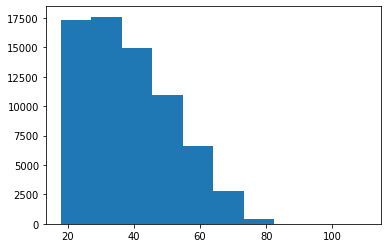

In [207]:
import matplotlib.pyplot as plt
plt.hist(data['Dem_age'])

In [203]:
data.drop(columns=['UserLanguage','Dem_state'],inplace=True)

In [193]:
data=unfiltered_data.loc[:,'Expl_Coping_1':'Expl_Coping_16']
data[['neu','ext','ope','agr','con','UserLanguage', 'Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom','Dem_employment', 'Country', 'Dem_Expat', 'Dem_state','Dem_maritalstatus']]=unfiltered_data[['neu','ext','ope','agr','con','UserLanguage', 'Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom',
      'Dem_employment', 'Country', 'Dem_Expat', 'Dem_state',
      'Dem_maritalstatus']]
data.dropna(inplace=True)


y=data.loc[:,'Expl_Coping_1':'Expl_Coping_16']
X=data[['neu','ext','ope','agr','con','UserLanguage', 'Dem_age', 'Dem_gender', 'Dem_edu']]
#X=unfiltered_data.drop(columns=['Expl_Coping_1','Expl_Coping_2','Expl_Coping_3','Expl_Coping_4','Expl_Coping_5','Expl_Coping_6','Expl_Coping_7','Expl_Coping_8','Expl_Coping_9','Expl_Coping_10','Expl_Coping_11','Expl_Coping_12','Expl_Coping_13','Expl_Coping_14','Expl_Coping_15','Expl_Coping_16'])


In [190]:
data.dtypes

Expl_Coping_1          int64
Expl_Coping_2          int64
Expl_Coping_3          int64
Expl_Coping_4          int64
Expl_Coping_5          int64
Expl_Coping_6          int64
Expl_Coping_7          int64
Expl_Coping_8          int64
Expl_Coping_9          int64
Expl_Coping_10         int64
Expl_Coping_11         int64
Expl_Coping_12         int64
Expl_Coping_13         int64
Expl_Coping_14         int64
Expl_Coping_15         int64
Expl_Coping_16         int64
neu                  float64
ext                  float64
ope                  float64
agr                  float64
con                  float64
UserLanguage          object
Dem_age                int64
Dem_gender            object
Dem_edu               object
Dem_edu_mom           object
Dem_employment        object
Country               object
Dem_Expat             object
Dem_state             object
Dem_maritalstatus     object
dtype: object

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)


ValueError: could not convert string to float: 'EN'

In [167]:
y_pred=knn.predict(X_test)
y_pred

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [168]:
mean_squared_error(y_test,y_pred)

0.3416982099900948

In [170]:
knn.score(X_test,y_test)

0.01804160181123532